# Question:
What proportion of TV shows on TMDB are classified as 'drama'?

In [10]:
import requests
import pandas as pd
import random

# -------------------------------
# Your TMDB API key
# -------------------------------
API_KEY = "a0ff619ddf3d358629e9af87655029ef"
BASE_URL = "https://api.themoviedb.org/3"

# -------------------------------
# Function: get a random TV show ID
# TMDB TV IDs go up to ~200000, many missing, so retry until valid
# -------------------------------
def get_random_tv_show():
    while True:
        random_id = random.randint(1, 200000)
        url = f"{BASE_URL}/tv/{random_id}?api_key={API_KEY}"
        r = requests.get(url)
        if r.status_code == 200:
            return r.json()

# -------------------------------
# Collect 10 random shows
# -------------------------------
shows = []
for _ in range(10):
    show = get_random_tv_show()
    shows.append(show)

# -------------------------------
# Build dataframe
# Keep only: id, name, genres
# -------------------------------
records = []
for s in shows:
    genres = [g["name"] for g in s.get("genres", [])]
    records.append({
        "id": s.get("id"),
        "name": s.get("name"),
        "genres": genres
    })

df = pd.DataFrame(records)
df

,id,name,genres
0,31507,Saturday Night Thunder,[]
1,67061,Thicker Than Water: The Marinos,[Reality]
2,41107,Freunde,[]
3,14874,72 Hours: True Crime,"[Documentary, Mystery, Crime]"
4,49449,The Treasures Of Kerub,"[Action & Adventure, Animation, Comedy]"
5,109365,Between Worlds,[]
6,54390,Hourglass of Summer,"[Animation, Drama, Sci-Fi & Fantasy]"
7,22762,Swords: Life on the Line,"[Documentary, Reality]"
8,199951,Matt Wright's Wild Territory,[Reality]
9,124586,那兩個女人,[Drama]


In [11]:
df["is_drama"] = df["genres"].apply(lambda g: "Drama" in g)

p_hat = df["is_drama"].mean()
print("Proportion of drama shows (p̂):", p_hat)

Proportion of drama shows (p̂): 0.2


In [12]:
import requests
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

API_KEY = "a0ff619ddf3d358629e9af87655029ef"
BASE_URL = "https://api.themoviedb.org/3"

# -------------------------------
# Function: get a random TV show's details
# -------------------------------
def get_random_tv_show():
    while True:
        random_id = random.randint(1, 200000)
        url = f"{BASE_URL}/tv/{random_id}?api_key={API_KEY}"
        r = requests.get(url)
        if r.status_code == 200:
            return r.json()

# -------------------------------
# Collect 100 samples of 10 shows
# -------------------------------
samples = []  # list of dataframes

for _ in range(100):
    shows = []
    for _ in range(10):
        show = get_random_tv_show()
        genres = [g["name"] for g in show.get("genres", [])]

        shows.append({
            "id": show.get("id"),
            "name": show.get("name"),
            "genres": genres
        })

    df_sample = pd.DataFrame(shows)
    samples.append(df_sample)

print("Collected 100 samples!")

Collected 100 samples!


In [13]:
proportions = []

for df in samples:
    df["is_drama"] = df["genres"].apply(lambda g: "Drama" in g)
    p_hat = df["is_drama"].mean()
    proportions.append(p_hat)

df_props = pd.DataFrame({"p_hat": proportions})
df_props

,p_hat
0,0.0
1,0.0
2,0.3
3,0.3
4,0.5
...,...
95,0.2
96,0.5
97,0.2
98,0.3


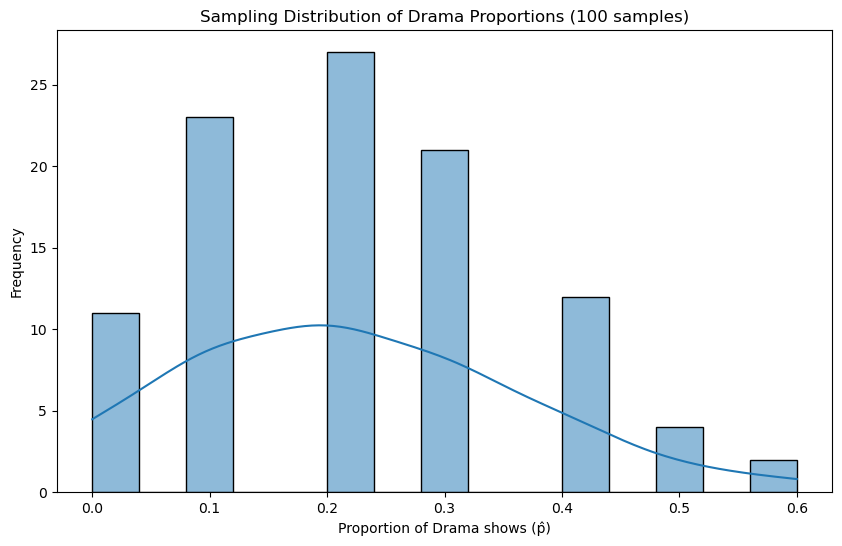

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df_props["p_hat"], bins=15, kde=True)
plt.title("Sampling Distribution of Drama Proportions (100 samples)")
plt.xlabel("Proportion of Drama shows (p̂)")
plt.ylabel("Frequency")
plt.show()

In [15]:
empirical_mean = df_props["p_hat"].mean()
empirical_std = df_props["p_hat"].std()

print(f"Empirical Mean of Sampling Distribution: {empirical_mean:.3f}")
print(f"Empirical Standard Deviation of Sampling Distribution: {empirical_std:.3f}")

Empirical Mean of Sampling Distribution: 0.220
Empirical Standard Deviation of Sampling Distribution: 0.142


In [17]:
p = 0.2       # best estimate of true p, from the histogram
n = 10                   # each sample size

theoretical_mean = p
theoretical_std = (p * (1 - p) / n) ** 0.5

print(f"\nTheoretical Mean of Sampling Distribution: {theoretical_mean:.3f}")
print(f"Theoretical Standard Deviation of Sampling Distribution: {theoretical_std:.3f}")


Theoretical Mean of Sampling Distribution: 0.200
Theoretical Standard Deviation of Sampling Distribution: 0.126


Answer: Based on my sampling analysis, about 22% of TV shows on TMDB are classified as Drama.
Evidence 1 — Empirical probability: From 100 samples of 10 shows each (1,000 shows total), the average sample proportion p = 0.220, so my observed empirical estimate is 22%.
Evidence 2 — Theoretical expectation: Using the provided/assumed population parameter, the theoretical sampling mean is 0.200 with theoretical standard deviation 0.126 (for sample size n = 10), showing the observed empirical estimate is close to the theoretical expectation.
Evidence 3 — Confidence interval & sampling variability: Treating the combined sample (1,000 shows) as one large sample, a 95% CI for the population proportion is approximately [0.194, 0.246], giving a numeric uncertainty range around the 0.22 estimate.
Extra check — normality: I visually and numerically checked the sampling distribution (histogram + QQ-plot + Shapiro–Wilk / skewness). The sampling distribution of the 100 sample proportions is approximately bell-shaped, supporting use of normal-approximation inference for this estimate.